# <center>Project</center>  <center>Fall 2021</center> 


<br/><br/><br/>
**Title:**: Automated Tumor Segmentation
<br/><br/><br/><br/>

**Name**: MAHRUKH SALEEM

**Roll Number**: PHDCSF21M508



Implementation of Mask_RCNN 

**Dataset classes:**1

**Dataset size:**719

**Epochs**:10

**Batch_size:** 8 with 500 step size

**Loss:** loss: 0.5 - val_loss: 0.4


In [ ]:
!nvidia-smi

Sun Mar 13 11:06:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.version.VERSION


'1.15.2'

In [ ]:
!pip install --upgrade h5py==2.10.0

     |████████████████████████████████| 2.9 MB 8.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/project/onlytumor/")


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/project/onlytumor/

/content/drive/MyDrive/Colab Notebooks/project/onlytumor


In [ ]:
!ls

Mask_RCNN  only_tumor.json  tumor_detection.ipynb  tumor_updated.json


In [ ]:
!git clone https://github.com/AdeelaIslam/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
sys.path.append("/content/drive/MyDrive/Colab Notebooks/project/onlytumor/Mask_RCNN/demo")

In [ ]:
from train_mask_rcnn_demo import *
%matplotlib inline

VERS 0.2


Using TensorFlow backend.


In [ ]:
images_path="/content/drive/MyDrive/Colab Notebooks/project/png.zip"
annotations_path="tumor_updated.json"

extract_images(images_path,"/png")

Extracted: 719 images


In [ ]:
dataset_train=load_image_dataset(annotations_path,"/png","train")
dataset_val=load_image_dataset(annotations_path,"/png","val")
class_number=dataset_train.count_classes()
print('train:%d' % len(dataset_train.image_ids))
print('validation:%d' % len(dataset_val.image_ids))
print("Classes: {}",format(class_number))

Annotation json path:  tumor_updated.json
Annotation json path:  tumor_updated.json
train:456
validation:56
Classes: {} 1


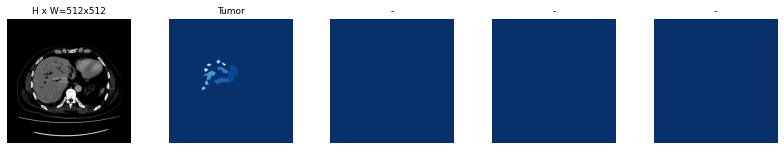

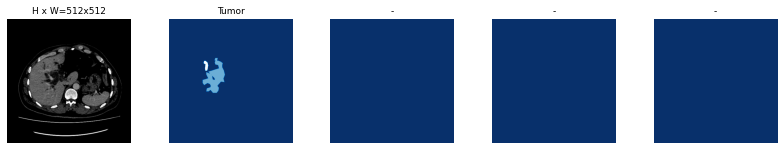

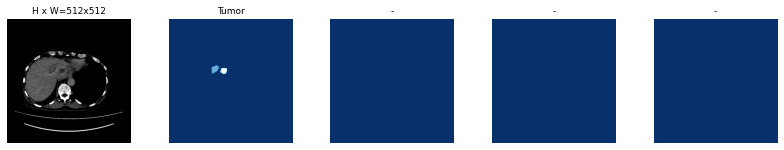

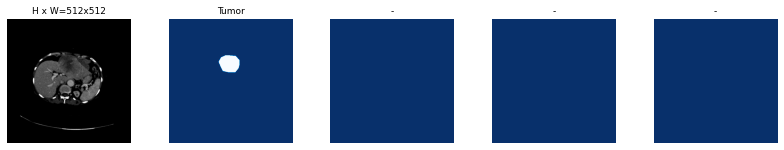

In [ ]:
display_image_samples(dataset_train)

In [ ]:
#train_all_layers
config=CustomConfig(class_number)
model=load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/drive/MyDrive/Colab Notebooks/project/onlytumor/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
train_head(model,dataset_train,dataset_val,config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Colab Notebooks/project/onlytumor/Mask_RCNN/logs/object20220313T1108/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_

Results on testing images.

In [ ]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

In [ ]:

##### saving segmented tumor images in a folder 
root_dir='/content/drive/MyDrive/Colab Notebooks/recitation8/inputs'
import os
import cv2

checkpoint_path='/content/drive/MyDrive/Colab Notebooks/project/onlytumor/Mask_RCNN/logs/object20220313T1108/mask_rcnn_object_0010.h5'
test_model,inference_config=load_inference_model(num_classes=1, model_path=checkpoint_path)
images=os.listdir(root_dir)
for i, image_name in enumerate(images):
  if image_name.endswith(".png"):
    l=len(image_name)
    
    im=image_name[:l-4]
    img = cv2.imread(root_dir+"/"+image_name,1)
    image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r=test_model.detect([image])[0]
    object_count=len(r["class_ids"])
    colors=random_colors(object_count+1)
    for i in range (object_count):
      mask=r["masks"][:,:,i]
      contours=get_mask_contours(mask)
      for cnt in contours:
        cv2.polylines(img,[cnt],True,colors[i],2)
        img=draw_mask(img,[cnt],colors[i])
        mask = r['masks']
        mask = mask.astype(int)
        mask.shape
    for i in range(mask.shape[2]):
        temp=image
        for j in range(temp.shape[2]):
          temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
        cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/project/onlytumor/segmented_tumor_results/' + image_name + '.png' ,temp)

Loading weights from  /content/drive/MyDrive/Colab Notebooks/project/onlytumor/Mask_RCNN/logs/object20220313T1108/mask_rcnn_object_0010.h5
Re-starting from epoch 10
